In [5]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'User-Agent':
    'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko)
    Chrome/63.0.3239.132 Safari/537.36',
    'Cookie':
    'lianjia_uuid=9d3277d3-58e4-440e-bade-5069cb5203a4; 
    UM_distinctid=16ba37f7160390-05f17711c11c3e-454c0b2b-100200-16ba37f716618b; 
    _smt_uid=5d176c66.5119839a; sensorsdata2015jssdkcross=%7B%22distinct_id%22
    %3A%2216ba37f7a942a6-0671dfdde0398a-454c0b2b-1049088-16ba37f7a95409%22%2C
    %22%24device_id%22%3A%2216ba37f7a942a6-0671dfdde0398a-454c0b2b-1049088-16
    ba37f7a95409%22%2C%22props%22%3A%7B%22%24latest_traffic_source_type%22%3A
    %22%E7%9B%B4%E6%8E%A5%E6%B5%81%E9%87%8F%22%2C%22%24latest_referrer%22%3
    A%22%22%2C%22%24latest_referrer_host%22%3A%22%22%2C%22%24latest_search_k
    eyword%22%3A%22%E6%9C%AA%E5%8F%96%E5%88%B0%E5%80%BC_%E7%9B%B4%E6%8E%A5%
    E6%89%93%E5%BC%80%22%7D%7D; _ga=GA1.2.1772719071.1561816174; Hm_lvt_9152f
    8221cb6243a53c83b956842be8a=1561822858; _jzqa=1.2532744094467475000.156181
    6167.1561822858.1561870561.3; CNZZDATA1253477573=987273979-1561811144-%7C
    1561865554; CNZZDATA1254525948=879163647-1561815364-%7C1561869382; CNZZDA
    TA1255633284=1986996647-1561812900-%7C1561866923; CNZZDATA1255604082=8915
    70058-1561813905-%7C1561866148; _qzja=1.1577983579.1561816168942.15618228
    57520.1561870561449.1561870561449.1561870847908.0.0.0.7.3; select_city=110
    000; lianjia_ssid=4e1fa281-1ebf-e1c1-ac56-32b3ec83f7ca; srcid=eyJ0Ijoie1w
    iZGF0YVwiOlwiMzQ2MDU5ZTQ0OWY4N2RiOTE4NjQ5YmQ0ZGRlMDAyZmFhODZmNjI1ZDQyNWU0O
    GQ3MjE3Yzk5NzFiYTY4ODM4ZThiZDNhZjliNGU4ODM4M2M3ODZhNDNiNjM1NzMzNjQ4ODY3MWV
    hMWFmNzFjMDVmMDY4NWMyMTM3MjIxYjBmYzhkYWE1MzIyNzFlOGMyOWFiYmQwZjBjYjcyNmIwO
    WEwYTNlMTY2MDI1NjkyOTBkNjQ1ZDkwNGM5ZDhkYTIyODU0ZmQzZjhjODhlNGQ1NGRkZTA0ZTB
    lZDFiNmIxOTE2YmU1NTIxNzhhMGQ3Yzk0ZjQ4NDBlZWI0YjlhYzFiYmJlZjJlNDQ5MDdlNzcxM
    zAwMmM1ODBlZDJkNmIwZmY0NDAwYmQxNjNjZDlhNmJkNDk3NGMzOTQxNTdkYjZlMjJkYjAxYjI
    zNjdmYzhiNzMxZDA1MGJlNjBmNzQxMTZjNDIzNFwiLFwia2V5X2lkXCI6XCIxXCIsXCJzaWduX
    CI6XCIzMGJlNDJiN1wifSIsInIiOiJodHRwczovL2JqLmxpYW5qaWEuY29tL3p1ZmFuZy9yY28
    zMS8iLCJvcyI6IndlYiIsInYiOiIwLjEifQ=='
}


def set_link(city, year):
    link = []
    for i in range(1, 13):
        if i < 10:
            url = 'http://lishi.tianqi.com/{}/{}0{}.html'.format(city, year, i)
        else:
            url = 'http://lishi.tianqi.com/{}/{}{}.html'.format(city, year, i)
        link.append(url)
    return link


def get_page(url, headers):
    html = requests.get(url, headers=headers)
    if html.status_code == 200:
        html.encoding = html.apparent_encoding
        return html.text
    else:
        return None


date_box = []
max_temp = []
min_temp = []
weh = []
wind = []
week_box = []


def get_data(link):
    for url in link:
        html = get_page(url, headers)
        bs = BeautifulSoup(html, 'html.parser')

        data = bs.find_all(class_='thrui')
        date = re.compile('class="th200">(.*?)</')
        tem = re.compile('class="th140">(.*?)</')
        time = re.findall(date, str(data))
        for item in time:
            week = item[10:]
            week_box.append(week)
            date_box.append(item[:10])
        temp = re.findall(tem, str(data))
        for i in range(len(time)):
            max_temp.append(temp[i * 4 + 0])
            min_temp.append(temp[i * 4 + 1])
            weh.append(temp[i * 4 + 2])
            wind.append(temp[i * 4 + 3])


def main():
    city = input("请输入城市拼音：")
    year = int(input("请输入年份："))
    link = set_link(city, year)
    get_data(link)
    datas = pd.DataFrame({
        '日期': date_box,
        '星期': week_box,
        '最高温度': max_temp,
        '最低温度': min_temp,
        '天气': weh,
        '风向': wind
    })
    datas.to_csv('./weatherData.csv', encoding='utf_8_sig')
    print(datas)


if __name__ == "__main__":
    main()

请输入城市拼音：heyuan
请输入年份：2023
             日期     星期 最高温度 最低温度    天气      风向
0    2023-01-01   星期日   17℃  11℃    多云   北风 2级
1    2023-01-02   星期一   17℃  10℃    多云   东风 2级
2    2023-01-03   星期二   16℃  11℃    多云   北风 2级
3    2023-01-04   星期三   17℃  11℃    多云   北风 3级
4    2023-01-05   星期四   22℃  10℃    多云  东北风 2级
..          ...    ...  ...  ...   ...     ...
360  2023-12-27   星期三   23℃  10℃  晴~多云   北风 1级
361  2023-12-28   星期四   24℃  11℃   阴~晴   北风 1级
362  2023-12-29   星期五   25℃  12℃  阴~多云  西北风 1级
363  2023-12-30   星期六   21℃  14℃  阴~多云  西北风 1级
364  2023-12-31   星期日   25℃  13℃    多云  东北风 2级

[365 rows x 6 columns]


#### 打印前5行

In [6]:
import pandas as pd

weather_data = pd.read_csv('weatherData.csv')

weather_data.head()

,Unnamed: 0,日期,星期,最高温度,最低温度,天气,风向
0,0,2023-01-01,星期日,17℃,11℃,多云,北风 2级
1,1,2023-01-02,星期一,17℃,10℃,多云,东风 2级
2,2,2023-01-03,星期二,16℃,11℃,多云,北风 2级
3,3,2023-01-04,星期三,17℃,11℃,多云,北风 3级
4,4,2023-01-05,星期四,22℃,10℃,多云,东北风 2级


计算平均温度

In [8]:
import pandas as pd

weather_data['日期'] = pd.to_datetime(weather_data['日期'])

weather_data['月份'] = weather_data['日期'].dt.month

weather_data['最高温度'] = weather_data['最高温度'].str.extract('(\d+)').astype(float)
weather_data['最低温度'] = weather_data['最低温度'].str.extract('(\d+)').astype(float)

grouped_data = weather_data.groupby(['月份'])

average_temperature = grouped_data[['最高温度', '最低温度']].mean()

print(average_temperature)

         最高温度       最低温度
月份                      
1   17.322581   9.709677
2   21.321429  12.071429
3   23.580645  14.838710
4   25.600000  19.133333
5   29.967742  22.387097
6   32.333333  24.700000
7   33.677419  25.645161
8   32.580645  24.516129
9   31.500000  24.133333
10  26.677419  19.193548
11  24.833333  15.033333
12  18.903226   9.741935


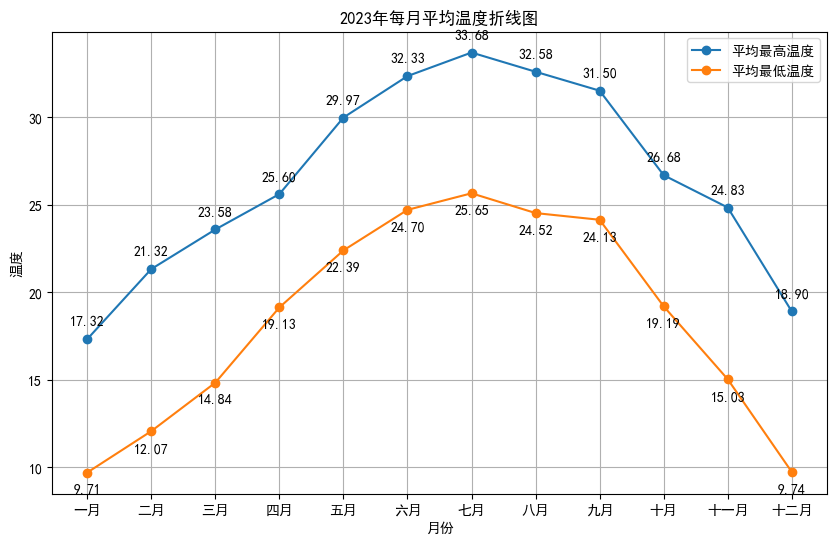

In [16]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']

plt.figure(figsize=(10, 6))
plt.plot(average_temperature.index,
         average_temperature['最高温度'],
         label='平均最高温度',
         marker='o')
plt.plot(average_temperature.index,
         average_temperature['最低温度'],
         label='平均最低温度',
         marker='o')

# 在每个点上显示数值
for i, txt in enumerate(average_temperature['最高温度']):
    plt.annotate(f'{txt:.2f}', (average_temperature.index[i], txt),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

for i, txt in enumerate(average_temperature['最低温度']):
    plt.annotate(f'{txt:.2f}', (average_temperature.index[i], txt),
                 textcoords="offset points",
                 xytext=(0, -15),
                 ha='center')

plt.xticks(
    average_temperature.index,
    ['一月', '二月', '三月', '四月', '五月', '六月', '七月', '八月', '九月', '十月', '十一月', '十二月'])

plt.xlabel('月份')
plt.ylabel('温度')
plt.title('2023年每月平均温度折线图')
plt.legend()
plt.grid(True)
plt.show()

计算每种天气类型天数

In [18]:
weather_data['天气类型'] = weather_data['天气'].str.split().str[0]
weather_counts = weather_data['天气类型'].value_counts()
print(weather_counts)

天气类型
多云        96
阴~多云      50
晴         30
阴         18
小雨~多云     16
多云~阴      13
小雨~阵雨     11
多云~晴      11
晴~多云      11
中雨~阵雨     10
多云~阵雨      9
中雨~多云      8
雾~多云       7
小雨         7
阴~晴        5
阴~阵雨       5
小雨~阴       5
阴~雷阵雨      4
暴雨~大雨      4
雾          4
小雨~中雨      4
小雨~雷阵雨     4
多云~雷阵雨     3
多云~大雨      3
大雨~阵雨      3
雾~晴        3
阵雨~阴       2
中雨         2
中雨~阴       2
多云~中雨      1
小雨~大雨      1
多云~小雨      1
雾~小雨       1
阵雨         1
中雨到大雨      1
暴雨~雷阵雨     1
大雨~中雨      1
中雨~雷阵雨     1
大雨         1
大雨~雷阵雨     1
雷阵雨        1
雷阵雨~中雨     1
雾~阵雨       1
雨夹雪~阴      1
Name: count, dtype: int64


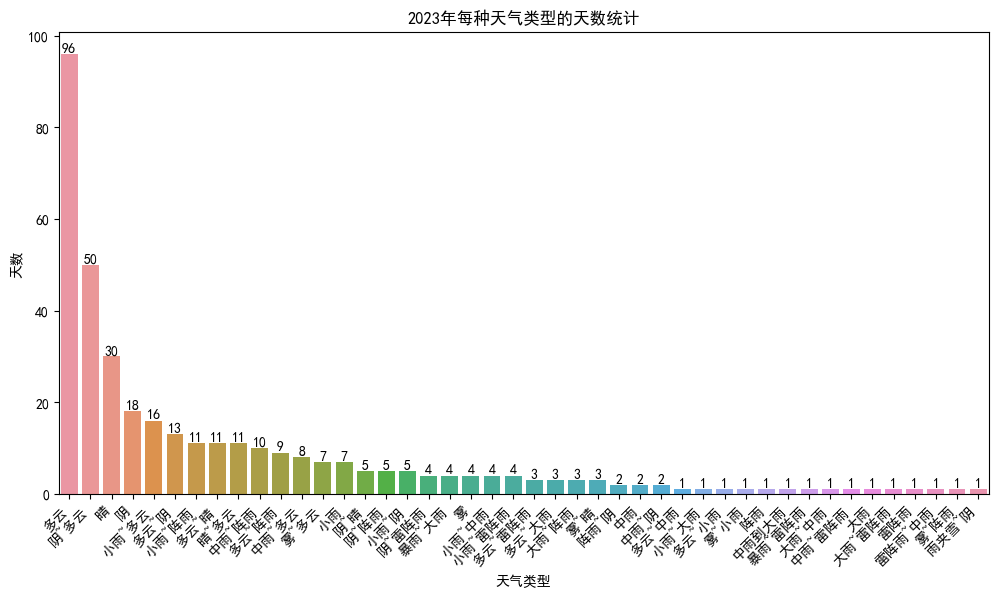

In [36]:
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']

# 绘制柱状图
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=weather_data, x='天气类型', order=weather_counts.index)
plt.xlabel('天气类型')
plt.ylabel('天数')
plt.title('2023年每种天气类型的天数统计')
#使用 ax.patches 来迭代遍历每个柱子，并通过 p.get_x(), p.get_width(), p.get_height() 等方法获取柱子的相关属性
for p in ax.patches:
    plt.text(p.get_x() + p.get_width() / 2.,
             p.get_height(),
             f'{int(p.get_height())}',
             ha='center',
             va='bottom')
#旋转标签
plt.xticks(rotation=45, ha='right')
plt.show()